# 50614165 Hari Chandan Gooda

## Problem 1: 
Does geographical pattern affect weekend availability?

How it is significant: Understanding whether certain regions are more likely available during weekends can give us insights about the regional crowd. This understanding will help us first prioritize local tourism, then filter out remaining places to recommend to other tourists. This way it not only promotes economic boost but also sustainable tourism.

How it leads to the objective: This is helpful for our objective since it meticulously handles tourism, especially during weekends, which is considered to be critical time by many touri it?

In [52]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import seaborn as sns

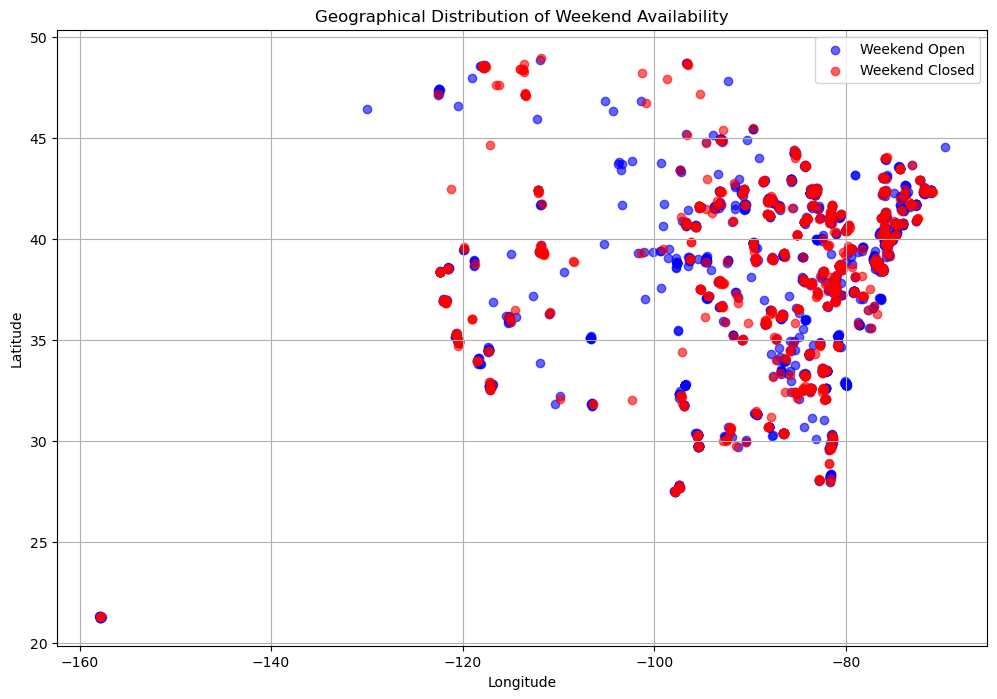

In [54]:
data = pd.read_csv('C:\\Users\\chand\\Downloads\\Data_5.csv')

location = data[['latitude', 'longitude', 'overall_avg_popularity', 'is_weekend_open']]

plt.figure(figsize=(12, 8))
plt.scatter(location[location['is_weekend_open'] == True]['longitude'],
            location[location['is_weekend_open'] == True]['latitude'],
            c='blue', label='Weekend Open', alpha=0.6)
plt.scatter(location[location['is_weekend_open'] == False]['longitude'],
            location[location['is_weekend_open'] == False]['latitude'],
            c='red', label='Weekend Closed', alpha=0.6)

# Customize the plot
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.title("Geographical Distribution of Weekend Availability")
plt.legend()
plt.show()


The plot above visualizes the geographical distribution of locations that are open or closed on weekends, using latitude and longitude. This gives an initial view of potential regional patterns. Given the latitude and the longitude in the dataset, it visualizes different locations in the United States. We have around 2000 records in the dataset and the plot gives the location for each data point and whether it is open or close on weekends.

To understand the insights from the dataset, I'm filtering the latitude, the longitude and the overall average popularity. My output determines whether a particular location is open on weekends on not. Specifically, I find the relation between the input columns with is_weekend_open column. is_weekend_open column is converted from true/false to 1/0 respectively.

Accuracy: 0.66
Test Accuracy: 0.66
Classification Report:
               precision    recall  f1-score   support

           0       0.42      0.53      0.47        68
           1       0.80      0.71      0.75       175

    accuracy                           0.66       243
   macro avg       0.61      0.62      0.61       243
weighted avg       0.69      0.66      0.67       243

Accuracy: 0.71
Test Accuracy: 0.71
Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.38      0.42        68
           1       0.78      0.83      0.80       175

    accuracy                           0.71       243
   macro avg       0.62      0.61      0.61       243
weighted avg       0.69      0.71      0.70       243



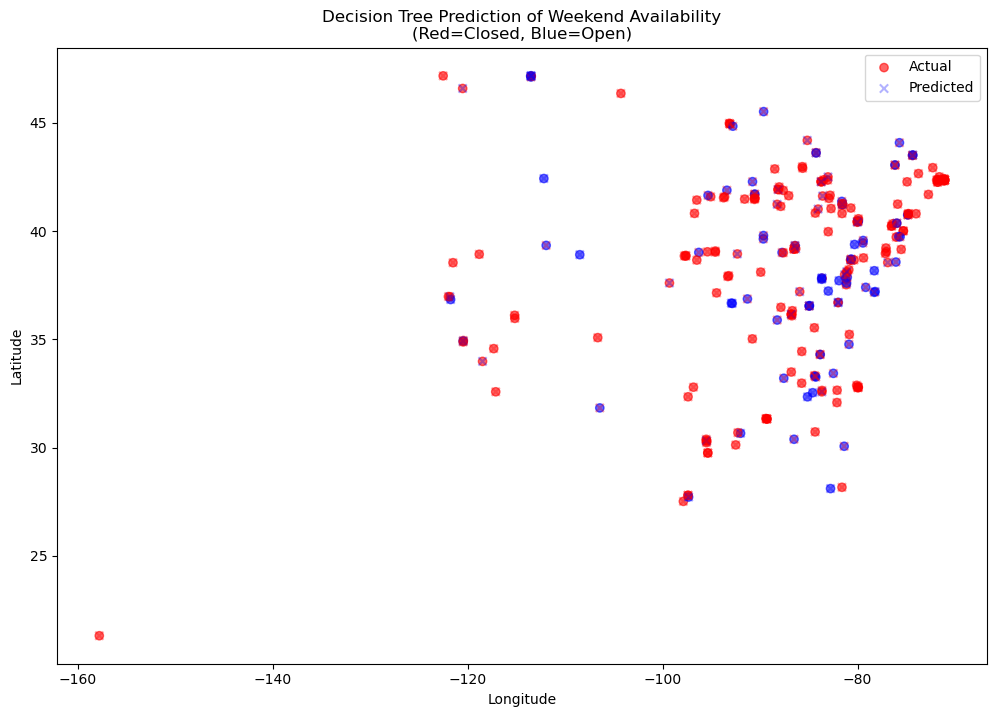

In [57]:


X = location[['latitude', 'longitude', 'overall_avg_popularity']]
y = location['is_weekend_open'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

classifier1 = RandomForestClassifier(random_state=42)
classifier1.fit(X_train, y_train)

y_pred_1 = classifier1.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("Classification Report:\n", report)

accuracy = accuracy_score(y_test, y_pred_1)
report = classification_report(y_test, y_pred_1)
print(f"Accuracy: {accuracy:.2f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_1):.2f}")
print("Classification Report:\n", report)

plt.figure(figsize=(12, 8))
plt.scatter(X_test['longitude'], X_test['latitude'], c=y_test, cmap='bwr', label='Actual', alpha=0.6, marker='o')
plt.scatter(X_test['longitude'], X_test['latitude'], c=y_pred_1, cmap='bwr', label='Predicted', alpha=0.3, marker='x')

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Decision Tree Prediction of Weekend Availability\n(Red=Closed, Blue=Open)")
plt.legend(["Actual", "Predicted"], loc="upper right")
plt.show()


By observing clusters of red (closed) and blue (open) points, one might identify regions with distinct weekend availability patterns. Certain areas may predominantly offer services on weekends, on the other hand others may not, which perhaps reflects regional tourism policies or demand.

Overlaps in predicted vs. actual values indicate accurate predictions, while discrepancies in the plot reveal where the model struggles. For example, if a model predicts certain locations as open on weekends (blue) that are actually closed (red), it suggests there might be factors influencing availability that were not captured in the current features.

Observing regions with mixed results may hint at additional features influencing weekend availability, like seasonality, specific city characteristics, or tourist crowds.

## Problem 2:
How does the operational time (working hours) of a location affect its popularity?

How it leads to our objective: By identifying this, it will reveal the optimistic visiting hours for the tourists and it will recommend the time slots for feasible tourism, mainly for places which prioritize the low environmental impact on off-peak hours.

Why it is significant: It will recognize the relationship between how long is the location hours (Working hours) and its popularity can able to predict the best hours for tourists. Location which has longer hours may attract more visitors.

In this code, I'm considering subgrouping overall average popularity as low medium and high. I'm filtering weekday hoursm weekend hours, rating, weekday weekend ratio and rating scaled as input features and popularity category as the output.

In [61]:
data['popularity_category'] = pd.qcut(data['overall_avg_popularity'], q=3, labels=['low', 'medium', 'high'])

X = data[['weekday_hours', 'weekend_hours', 'rating', 'weekday_weekend_ratio', 'rating_scaled']]
y = data['popularity_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_dt = grid_search.best_estimator_

y_pred_best_dt = best_dt.predict(X_test)
accuracy_best_dt = accuracy_score(y_test, y_pred_best_dt)
classification_report_best_dt = classification_report(y_test, y_pred_best_dt)

print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy_best_dt)
print("Classification Report:\n", classification_report_best_dt)

Best Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}
Accuracy: 0.5102880658436214
Classification Report:
               precision    recall  f1-score   support

        high       0.49      0.85      0.62       167
         low       0.60      0.45      0.51       150
      medium       0.45      0.23      0.30       169

    accuracy                           0.51       486
   macro avg       0.51      0.51      0.48       486
weighted avg       0.51      0.51      0.48       486



The model leverages weekday and weekend hours to categorize popularity. This implies that these features play a role in attracting visitors. For instance, locations with extended weekend hours might have better chances of falling into a higher popularity category.

However, the model's performance suggests that hours alone don’t determine popularity, so they’re likely part of a more complex interaction.

Additionallu, ratings play a significant role, with higher ratings likely contributing positively to a location’s popularity. By including both rating and rating_scaled, the model highlights that higher-rated locations tend to be more popular.

Also, adding interactions like rating * weekday_hours shows that a highly rated location with substantial weekday hours could predict higher popularity, hinting at the synergy between quality and accessibility.

Adding city and state as features helped the model by capturing regional preferences or popularity trends. Some areas might naturally attract more tourists, while others are known locally.

Cities or states with higher representations in the data that also predict higher popularity may indicate specific locations that align well with tourists’ preferences.

While operational hours, ratings, and geographical features provide some insight, the model’s accuracy (51%) suggests other external factors—like seasonal appeal, marketing, or specific attractions within each location—also impact popularity.

This model is best suited for general categorization rather than precise prediction. It provides a framework for identifying basic patterns, but a richer dataset with visitor demographics, event schedules, or environmental factors might yield a more predictive model.

C:\Users\chand\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


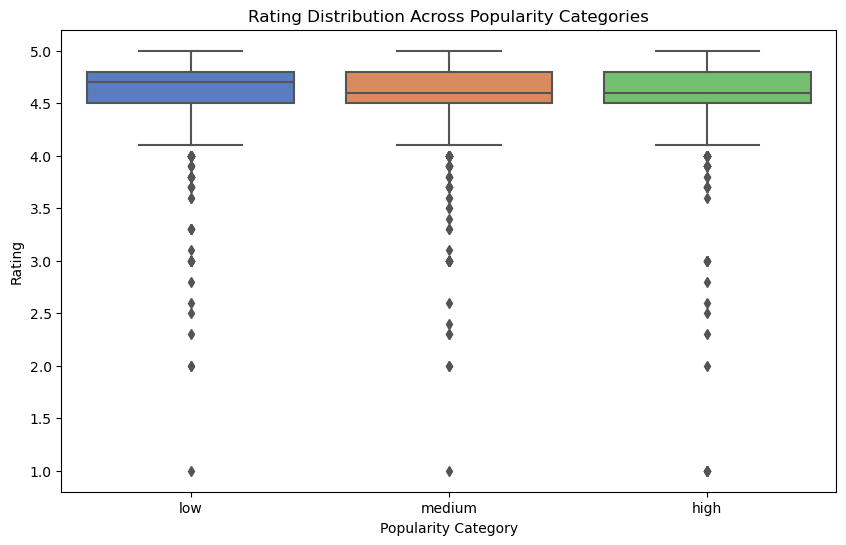

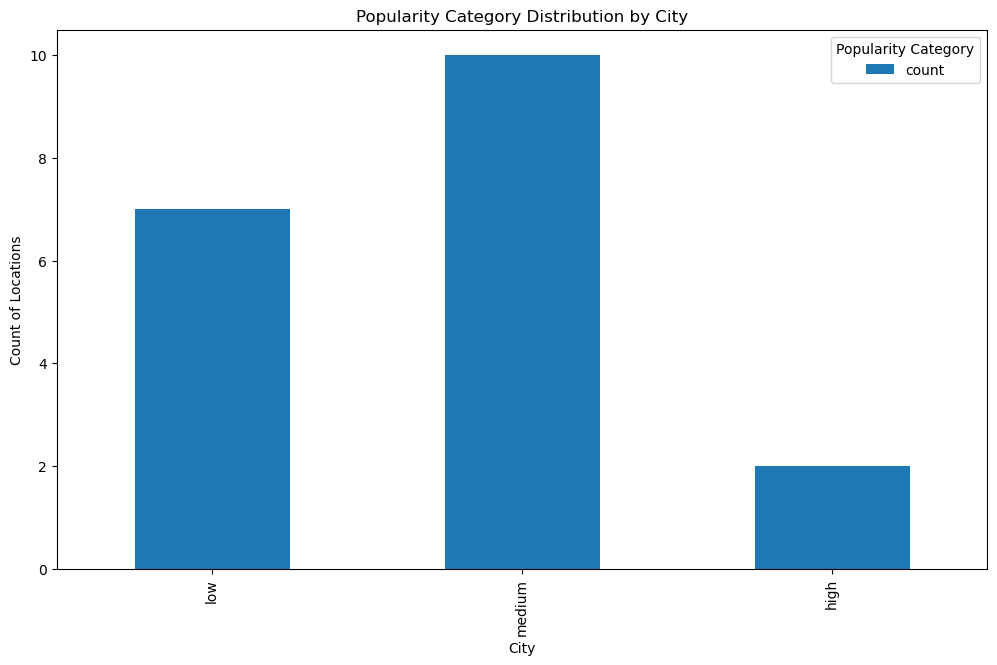

In [76]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='popularity_category', y='rating', palette='muted')
plt.title("Rating Distribution Across Popularity Categories")
plt.xlabel("Popularity Category")
plt.ylabel("Rating")
plt.show()

city = data[data['city'] == 'Mobile']
city_popularity = city['popularity_category'].value_counts().sort_index()

city_popularity.plot(kind='bar', stacked=True, figsize=(12, 7))
plt.title("Popularity Category Distribution by City")
plt.xlabel("City")
plt.ylabel("Count of Locations")
plt.legend(title="Popularity Category")
plt.show()

The boxplot shows how ratings differ among low, medium, and high popularity categories. Higher categories generally trend towards higher ratings, highlighting the influence of quality on popularity.
This bar plot demonstrates the count of locations in each popularity category by city. It helps to see if certain cities have more high-popularity locations, likely due to local appeal or regional attractions.